In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, pipeline
from sklearn.preprocessing import PolynomialFeatures

import training_models_helper as tmh
%aimport training_models_helper

tm = tmh.TrainingModelsHelper()

import svm_helper
%aimport svm_helper
svmh = svm_helper.SVM_Helper()

kn = tmh.KNN_Helper()

import transform_helper
%aimport transform_helper

th = transform_helper.Transformation_Helper()

iph = transform_helper.InfluentialPoints_Helper()

import svm_helper
%aimport svm_helper
svmh = svm_helper.SVM_Helper()

# Transformations

It is often the case that the "raw" features given to us don't lead to an adequately successful model
- We may need to create "synthetic" features.  
- Or filter out existing features
- This is called **feature engineering**.

Knowing how to perform feature engineering is a key skill of a Data Scientist.

As motivation, consider a Binary Classification task
- Examples have a single numeric feature $\x_1$
- Target $\y$ in classes Positive and Negative
    - encoded as 1 and 0

It should be clear from the plot that the classes are not linearly separable.

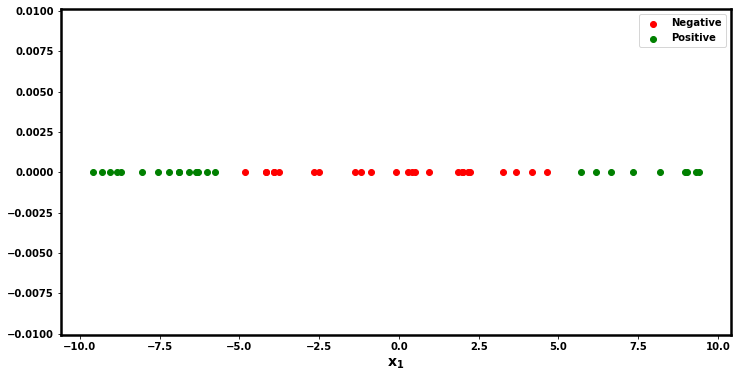

In [4]:
th = transform_helper.Transformation_Helper()
fig_raw, ax_raw, fig_trans, ax_trans = th.LinearSeparate_1d_example(max_val=10, num_examples=50, visible=False)

fig_raw

But consider the simple transformation that adds a second synthetic feature $\x_2$
- $\x_2 = \x_1^2$

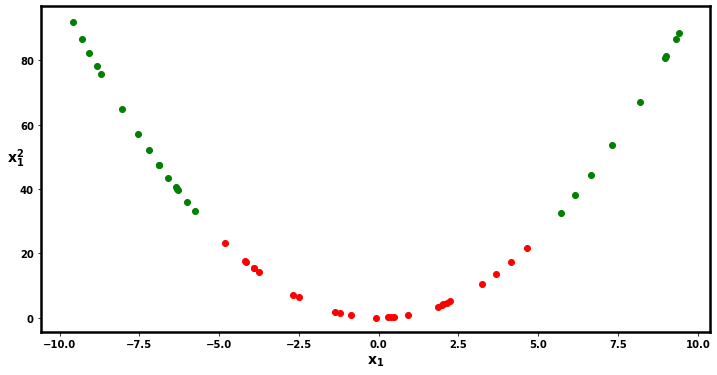

In [5]:
fig_trans

The transformed examples are now linearly separable.

Or consider trying to fit a linear model to the following data

In [6]:
sph = transform_helper.ShiftedPrice_Helper()
series_over_time = sph.gen_data()

fig, ax = plt.subplots(1,1, figsize=(12,6) )
_= sph.plot_data(series_over_time, ax=ax)
plt.close(fig)

figu, axu = plt.subplots(1,1, figsize=(12,6) )
_= sph.plot_data(series_over_time, ax=axu, nolabels=True)
plt.close(figu)


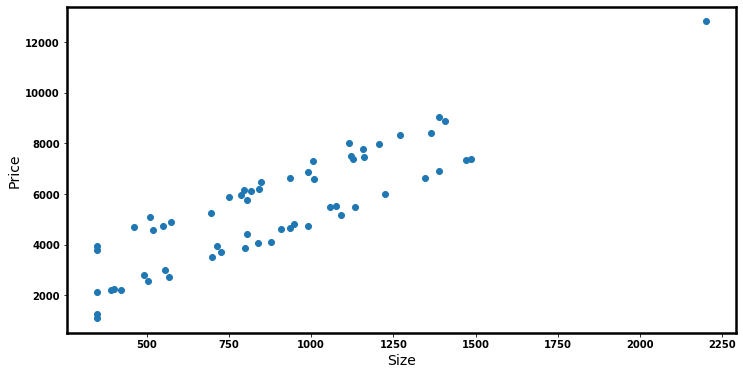

In [7]:
figu

We could fit a linear model but: is it a coincidence that there seem to be two clusters of examples ?

In fact not, as will be made clear by labeling the examples

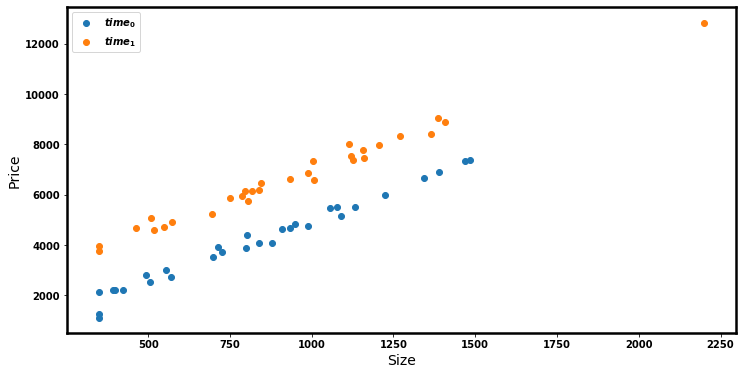

In [8]:
fig

The two clusters are, in fact, examples observed at different times
- It looks like there are *two* linear relationships
- Which vary with time

Fitting a linear model to the (raw) pooled data is an unsatisfying compromise:
- It's right on average (pooled) but poor for each cluster in isolation.

Can we do better ?

Also: Recall the Fundamental Principle of Machine Learning
- The training and test examples come from the same distribution

The examples from each cluster appear to be from different distributions
- The model will have poor in-sample performance ("compromise")
- It's likely that the out of sample performance will also be poor

The likely root cause ?  A missing feature.

One prime motivation for Transformations
- Is to take examples that look different on the surface
- And transform them so that they look similar
    - create the missing feature

Examples are often a scarce resource in Machine Learning
- Transformations are a way of increasing the number of applicable examples
    - Pooling over time, geography, type

Illustration
- Look different: Prices vary with time (inflation)
    - Make them similar: re-denominate prices as multiples of contemporaneous "cost of living"
- Look different: Prices vary with location
    - Make them similar: re-denominate prices as multiples of contemporaneous "cost of living"
- Look different: Some stocks trade for \\$10/share, others for \\$1000/share
    - Make them similar: consider returns (percentage price changes) rather than price
- Look different: Options on shares that trade for \\$10/share, others for \\$1000/share
    - Make them similar: re-denominate into "moneyness" (ratio of Share price to Strike price)
    

We focus on the process of transforming raw examples into a form that
facilitates successful modeling.

We broaden the  term *Transformation* to include
- Cleaning
- Numericalization of non-numeric features/targets
- Scaling

(These are distinct steps in the Recipe, but have similar API)

<table>
    <tr>
        <th><center>Recipe for Machine Learning</center></th>
    </tr>
    <tr>
        <td><img src="images/W1_L3_S4_ML_Process.png" width="100%"></td>
    </tr>
</table>
​

Our focus is mainly on the **why** rather than the **how**

Let's briefly review the *how*:
- [Mechanics of transformations](Transformations_Mechanics.ipynb)

For a refresher on implementation in `sklearn`
- Revisit our previous module [Coding transformations in `sklearn`](Transformations_Pipelines.ipynb))


# The why's of transformations

We illustrate several useful types of transformations below.

This is organized more as a "case study" than a taxonomy.
- Many transformations have multiple uses, making a hard taxonomy difficult


## Making the data fit your model's assumptions

Some models work under the assumption that there is a linear relationship between features and the target.

When this assumption doesn't hold, the "fit" is sub-optimal (prediction error)

Sometimes: transformations can induce linearity
- Add a squared term to make Linear Regression fit the "curvy" dataset better
- Changing the target to log odds to enable Linear Regression to work for Classification tasks

Let's visit the notebook section [Inducing linearity](Transformations.ipynb#Linearity-inducing-transformations:-Making-data-fit-your-model)

## Missing numeric feature

Sometimes, your examples have all the "information" you need, but in the wrong form.

Creating new "synthetic" features from raw features is one way of making this information
available to the model.

Let's visit the notebook section [Missing numeric feature](Transformations.ipynb#Transformation-to-add-a-%22missing%22-numeric-feature)

## Missing categorical feature: "group" indicator

**identical up to an additive constant**

There is a more subtle case of a missing feature
- Examples that naturally partition into sub-groups

The sub-groups might be examples that come from similar geographies or points in time.

The key is that
- The relationship between target and features is *almost identical* between groups
- With the exception of a constant shift
    
Adding indicator/dummy variables as new features to indicate sub-group membership may be a solution

Let's visit the notebook section [Missing Categorical Feature](Transformations.ipynb#Transformation-to-add-a-%22missing%22-categorical-feature)

## Cross features

We witnessed the power of a simple indicator feature to isolate differences between groups of
examples.

It is possible to
- Create multiple indicator features
- Create indicator features that are the *product* of other indicators

This is called a *cross feature* and is a powerful way to isolate complicated sub-groups of examples.

Let's visit the notebook section [Cross features](Transformations.ipynb#Cross-features)


## Scaling

There is a class of transformations that alter the *scale* (magnitude) of 
features or targets.

In the Recipe for ML, Scaling is treated as separate from the other transformations.

Perhaps this is because scaling is sometimes performed 
- *Not* strictly because of the relationship between target and features
- But because of the mathematics of the *loss function*

Let's visit the notebook section [Scale sensitive loss functions](Transformations.ipynb#Scaling)

## Normalization

We will use the term "normalization" (non-standard terminology ?) to refer
to a transformation that re-scales examples by different amounts
- As opposed to traditional "scaling" where all examples are scaled equally

Let's visit the notebook section [Normalization](Transformations.ipynb#Normalization)

# Transformed targets: remember to invert your prediction !

Suppose you transform your raw training set 
$$\langle \X, \y \rangle$$

to 
$$\langle \X', \y' \rangle$$

where $f$ is the transformation applied to targets
$$
\y' = f(\y)
$$

The units of $\y$ change from $u$ (e.g., dollars) to $u'$ (e.g., dimensionless z-score)

Then your model's predictions
$$
\hat{\y'}
$$
are in units of $u'$ **not** $u$.

You must **invert** the transformed predicted target $\hat{\y'}$ back to units of $u$
$$
\hat{\y} = f^{-1} ( \hat{\y'} )
$$

For example
$$
\y \mapsto \frac{\y - \mu}{\sigma}
$$
where $\mu, \sigma$ are the mean and standard deviation of the *training* examples $\y$

Then
$$
\hat{\y'} \mapsto \sigma * \hat{\y'} + \mu
$$

`sklearn` transformers provide an `inverse_transform` method to facilitate this.

# Other transformations

The continuation of the linked notebook describes more transformations, listed below.

We encourage you to study these.

We especially recommend the section [Feature engineering example](Transformations.ipynb#Feature-engineering-example:-Geron-Housing-Data)
which is a worked example from one of the recommend textbooks.

**Other transformations**

- [Normality inducing transformaton](Transformations.ipynb#Normality-inducing-transformations)
-  [Categorical variable transformation](Transformations.ipynb#Categorical-transformation) 
- [Transformations to induce normality](Transformations.ipynb#Normality-inducing-transformations)
- [Other transformation](Transformations.ipynb#Other-transformations)

In [9]:
print("Done")

Done
